# Project - Credit Card Customer Segmentation

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

In [2]:
#Read dataset and load into a dataframe
df = pd.read_excel("Credit Card Customer Data.xlsx")
df.head(3)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4


In [3]:
df.shape

(660, 7)

In [4]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [5]:
df.info()
# All fields are interger. First two fields - Sl No & Customer Key are key fields and wont be utilized in clustering.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [6]:
# No Null values in data
df.isnull().any()

Sl_No                  False
Customer Key           False
Avg_Credit_Limit       False
Total_Credit_Cards     False
Total_visits_bank      False
Total_visits_online    False
Total_calls_made       False
dtype: bool

### Print the descriptive statistics of each & every column using describe() function

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


### Univariate Analysis

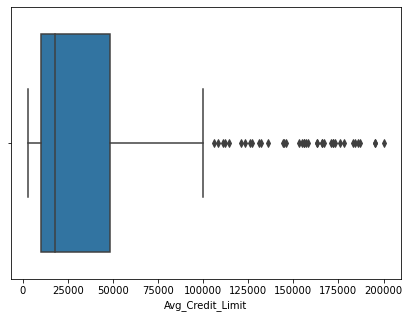

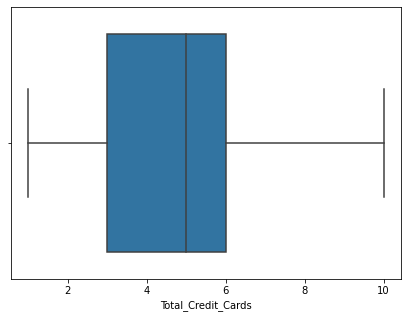

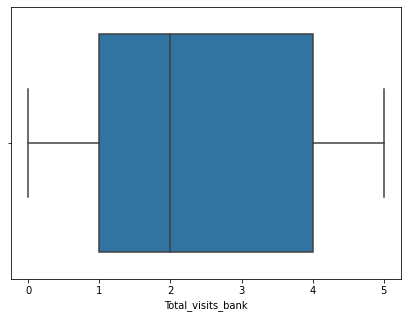

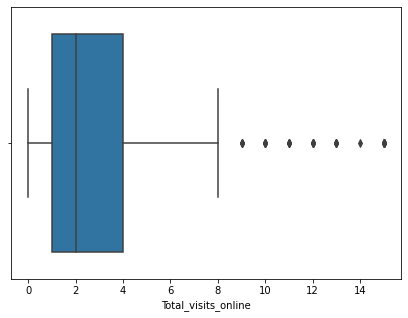

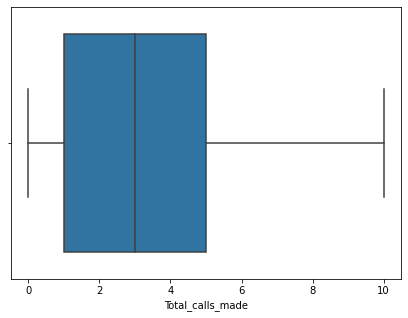

In [8]:
# Creating box plot for numerical data
for i in ['Avg_Credit_Limit', 'Total_Credit_Cards','Total_visits_bank', 'Total_visits_online', 'Total_calls_made']:
    plt.figure(figsize = (7,5))
    sns.boxplot(df[i])
    plt.show()

2    0.239394
1    0.169697
3    0.151515
0    0.151515
5    0.148485
4    0.139394
Name: Total_visits_bank, dtype: float64



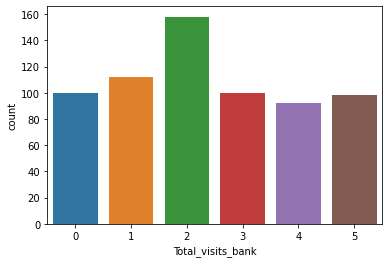

2     0.286364
0     0.218182
1     0.165152
4     0.104545
5     0.081818
3     0.066667
15    0.015152
7     0.010606
12    0.009091
10    0.009091
8     0.009091
13    0.007576
11    0.007576
9     0.006061
14    0.001515
6     0.001515
Name: Total_visits_online, dtype: float64



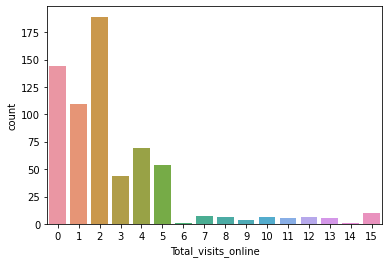

4     0.163636
0     0.146970
2     0.137879
1     0.136364
3     0.125758
6     0.059091
7     0.053030
9     0.048485
8     0.045455
5     0.043939
10    0.039394
Name: Total_calls_made, dtype: float64



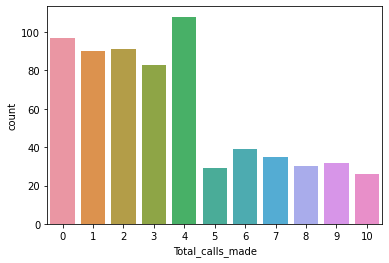

In [9]:
for i in ['Total_visits_bank', 'Total_visits_online', 'Total_calls_made']:   
    print(df[i].value_counts(normalize=True))
    print()
    sns.countplot(df[i])
    plt.show()

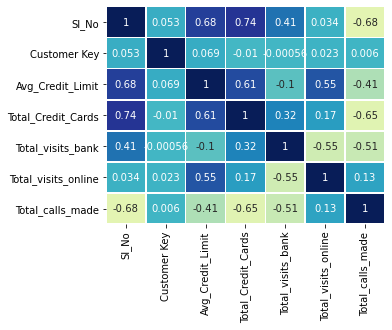

In [10]:
#Multivariate Analysis
plt.figure(figsize=(5,4))

sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()


In [11]:
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


### Scaling the data

In [12]:
df_km=df.iloc[:,2:]
df_scaled_km=df_km.apply(zscore) #Scaling for applying K-Means clustering

### Pair Plot of fields

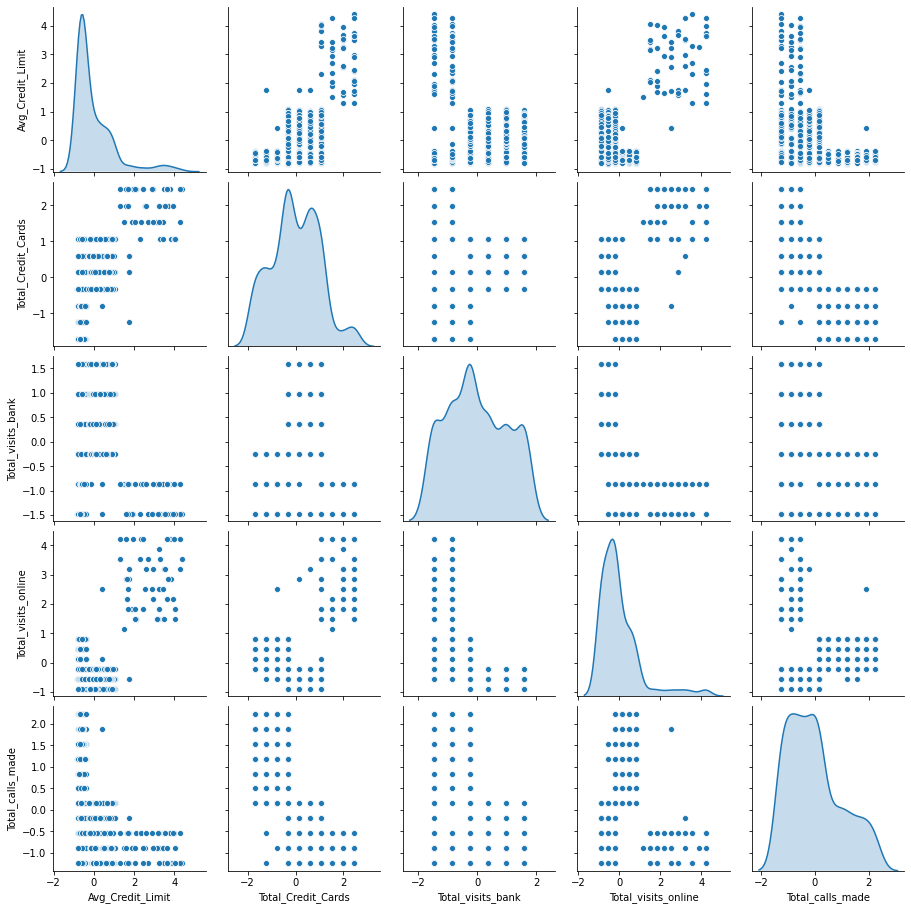

In [13]:
sns.pairplot(df_scaled_km,diag_kind='kde')

## Grouping similar data into Clusters using K-Means Clustering

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

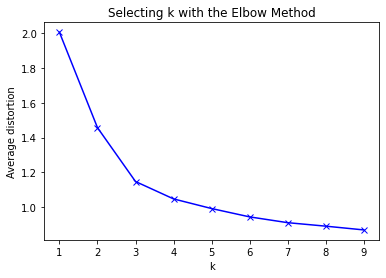

In [14]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_scaled_km)
    prediction=model.predict(df_scaled_km)
    meanDistortions.append(sum(np.min(cdist(df_scaled_km, model.cluster_centers_, 'euclidean'), axis=1)) / df_scaled_km.shape[0])
    

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [15]:
print (meanDistortions)

[2.0069222262503614, 1.4571553548514269, 1.1466276549150365, 1.0463825294774465, 0.9908683849620168, 0.9427934574350474, 0.9094343235465747, 0.889334054749758, 0.8677050327418504]


##### At k = 3, the inertia values starts reducing at a constant rate. So we select k = 3 and build our kmeans model. The total inertia for kmeans at k = 3 is 1.146

In [16]:
# Building Model with K = 3
final_model=KMeans(3)
final_model.fit(df_scaled_km)
prediction=final_model.predict(df_scaled_km)

#Append the prediction 
df_km["GROUP"] = prediction
df_scaled_km["GROUP"] = prediction
print("Groups Assigned : \n")
df_km.head()

Groups Assigned : 



c:\users\771337\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,1
1,50000,3,0,10,9,0
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,2


In [17]:
df_km_Clust = df_km.groupby(['GROUP'])
df_km_Clust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536
1,33782.383420,5.515544,3.489637,0.981865,2.000000
2,141040.000000,8.740000,0.600000,10.900000,1.080000


In [18]:
#Count of records going to group of 0,1,2
df_km['GROUP'].value_counts()

1    386
0    224
2     50
Name: GROUP, dtype: int64

#### Analyze the distribution of the data for K = 3 using visual tool is boxplot.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB4440DE48>,
      dtype=object)

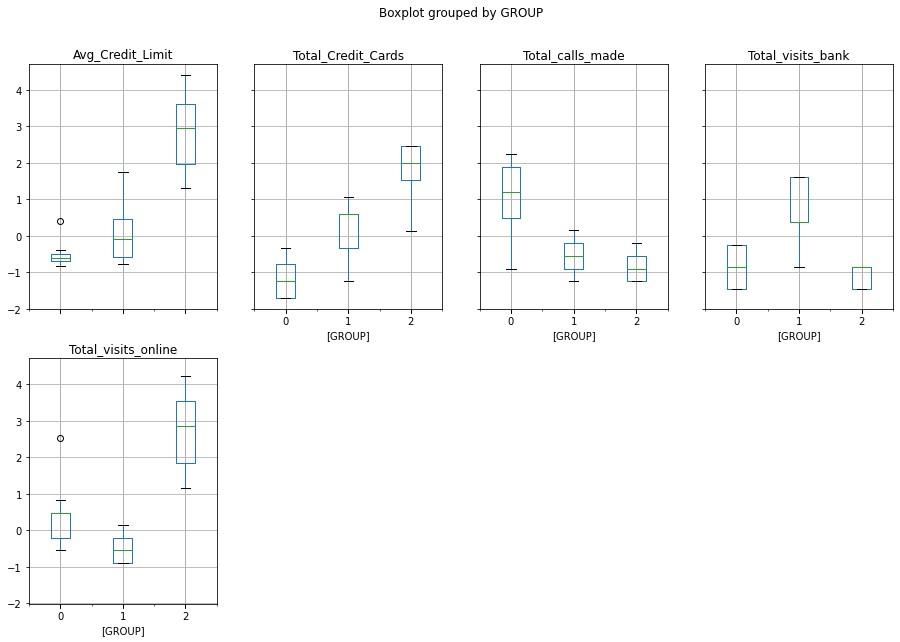

In [19]:
df_scaled_km.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

### Calculate average silhouette score for K-Means Clustering

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

print(f'Silhouette Score(n=3): {silhouette_score(df_scaled_km, prediction)}')

Silhouette Score(n=3): 0.5397786437631975


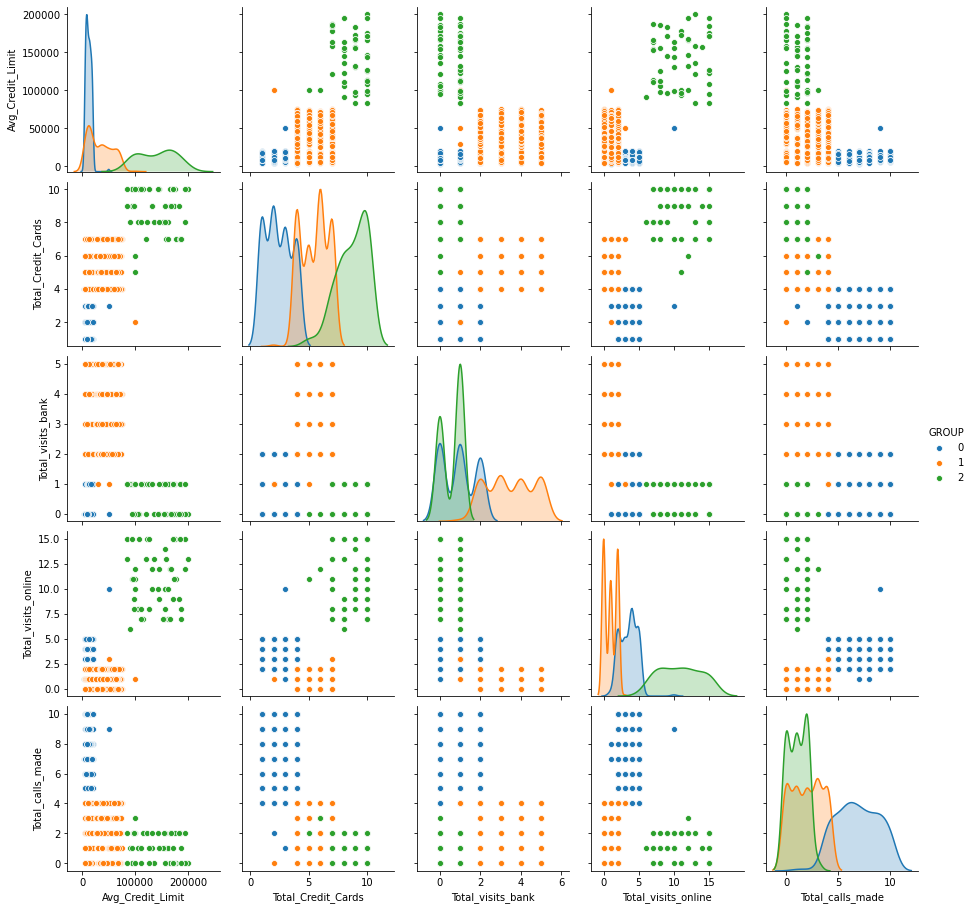

In [21]:
### Pairplot the dataframe with hue as GROUP to visualize the distribution of data across groups.
sns.pairplot(df_km,hue = 'GROUP')

# Hierarchical clustering 

###### Hierarchical clustering will be compared against 3 linkages - Average, Complete & Ward

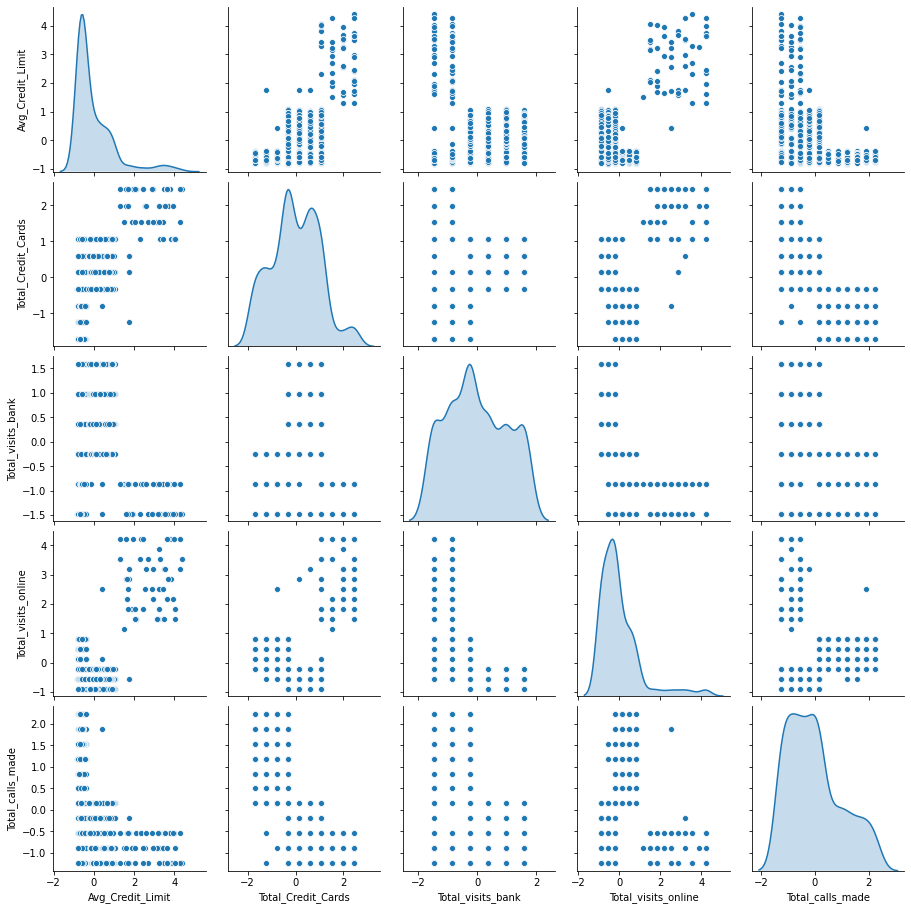

In [22]:
#Scaling the data
df_hier=df.iloc[:,2:]
df_scaled_h1=df_hier.apply(zscore) #Scaled dataframe for linkage='average'
df_scaled_h2=df_hier.apply(zscore) #Scaled dataframe for linkage='complete'
df_scaled_h3=df_hier.apply(zscore) #Scaled dataframe for linkage='ward'
sns.pairplot(df_scaled_h1,diag_kind='kde')

### Agglomerative Clustering with Average Linkage

In [23]:
# Building Model
from sklearn.cluster import AgglomerativeClustering 
model1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model1.fit(df_scaled_h1)
df_scaled_h1['labels']= model1.labels_
df_scaled_h1['labels'].value_counts()
df_hier['labels']= model1.labels_

c:\users\771337\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [24]:
df_clust_h1 = df_scaled_h1.groupby(['labels'])
df_clust_h1.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,-0.022902,0.371882,0.664034,-0.552775,-0.551200
1,2.831764,1.862226,-1.105763,2.827319,-0.874330
2,-0.595179,-1.062913,-0.904453,0.325372,1.152605


In [25]:
df_hier.groupby(['labels']).mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,12197.309417,2.403587,0.928251,3.560538,6.883408


In [26]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z1 = linkage(df_scaled_h1, metric='euclidean', method='average')
c, coph_dists = cophenet(Z1 , pdist(df_scaled_h1))

c

0.9252387749820263

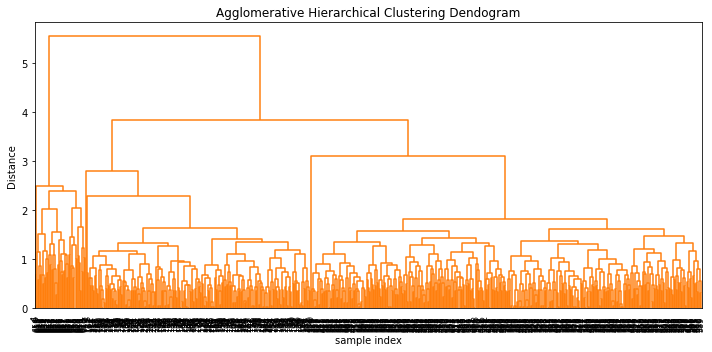

In [27]:
# Building Dendogram for Agglomerative Clustering with Average Linkage
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z1, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB47D1CC48>,
      dtype=object)

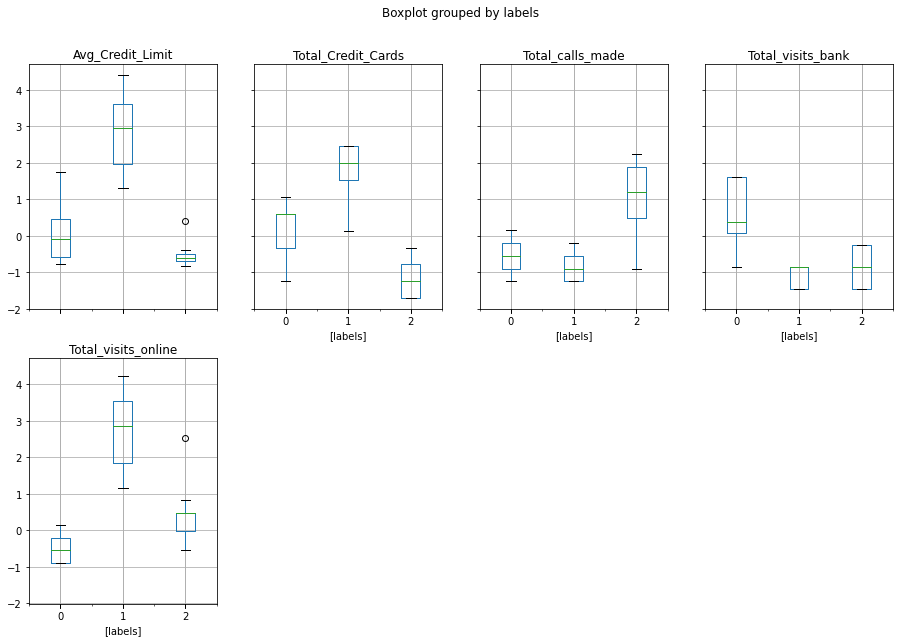

In [28]:
# Visualising using box plot
df_scaled_h1.boxplot(by='labels', layout = (2,4),figsize=(15,10))

### Agglomerative Clustering with Complete Linkage

In [29]:
from sklearn.cluster import AgglomerativeClustering 
model2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='complete')
model2.fit(df_scaled_h2)
df_scaled_h2['labels']= model2.labels_
df_scaled_h2['labels'].value_counts()

0    397
2    213
1     50
Name: labels, dtype: int64

In [30]:
#Pairwise distribution between data points
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z2 = linkage(df_scaled_h2, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z2 , pdist(df_scaled_h2))

c

0.8971731467324636

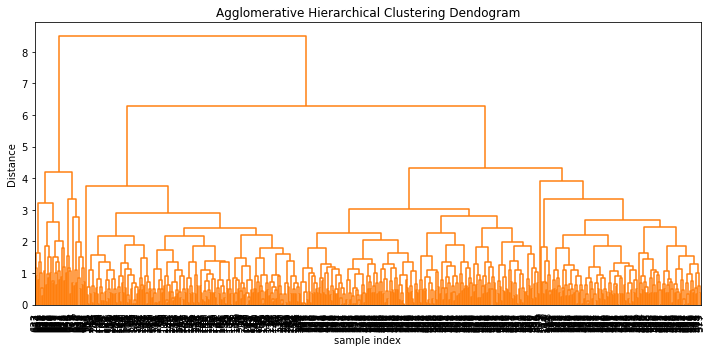

In [31]:
# Building dendogram for Agglomerative Clustering with Complete Linkage
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z2, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB46BA9188>,
      dtype=object)

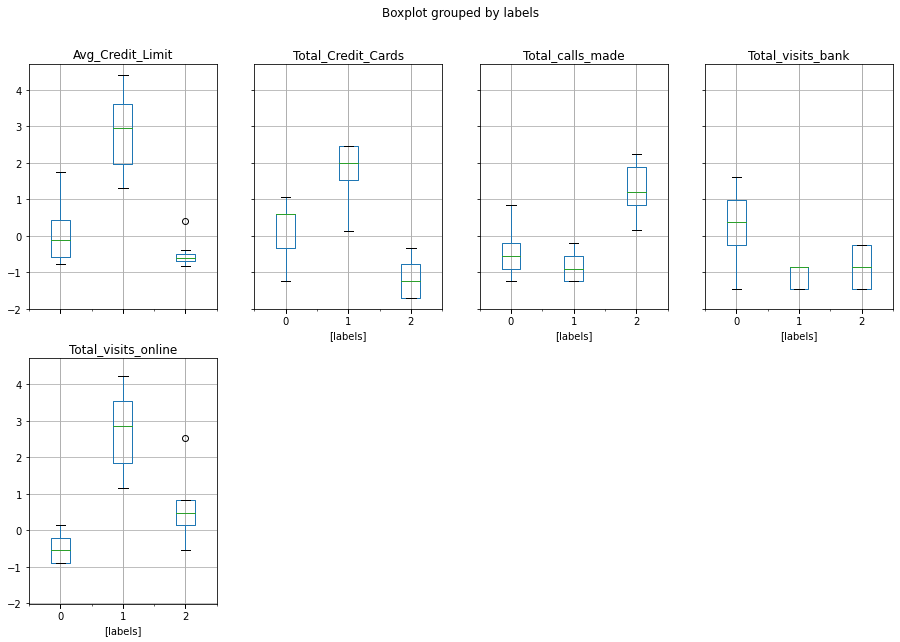

In [32]:
# Visualising using box plot
df_scaled_h2.boxplot(by='labels', layout = (2,4),figsize=(15,10))

### Agglomerative Clustering with Ward Linkage

In [33]:
#Building Model
from sklearn.cluster import AgglomerativeClustering 
model3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
model3.fit(df_scaled_h3)
df_scaled_h3['labels']= model3.labels_
df_scaled_h3['labels'].value_counts()

0    385
1    225
2     50
Name: labels, dtype: int64

In [34]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z3 = linkage(df_scaled_h3, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z3 , pdist(df_scaled_h3))

c

0.7733381987448996

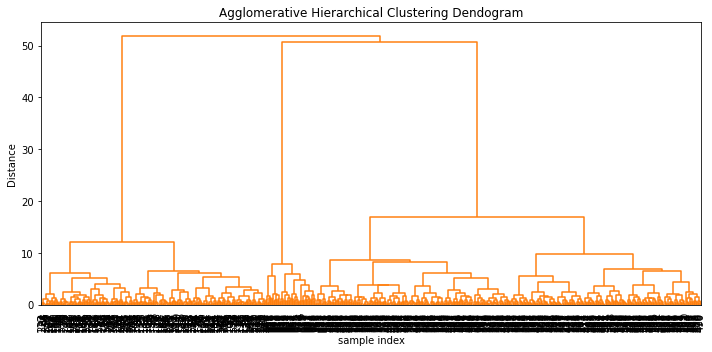

In [35]:
# Building dendogram
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z3, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB4915CE08>,
      dtype=object)

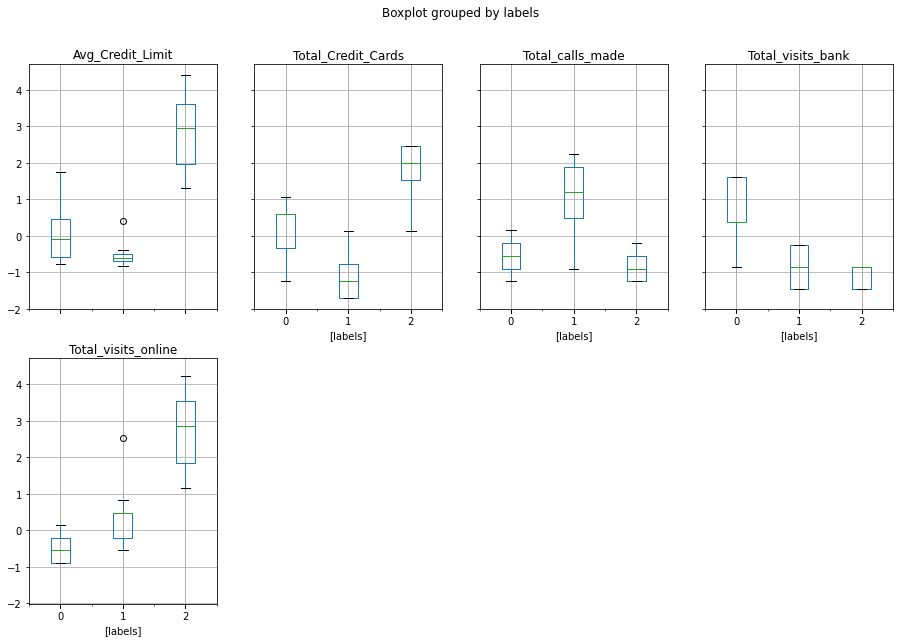

In [36]:
#Visualizing using box plot
df_scaled_h3.boxplot(by='labels', layout = (2,4),figsize=(15,10))

### Comparing Silhouette Score of K Means Clustering with Hierarchical clustering using linkages - Average, Complete & Ward

In [37]:
from sklearn import metrics

print("Silhouette Score of Hierarchical clustering using Average Linkage : ",metrics.silhouette_score(df_scaled_h1, df_scaled_h1['labels']))
print("Silhouette Score of Hierarchical clustering using Complete Linkage : ",metrics.silhouette_score(df_scaled_h2, df_scaled_h2['labels']))
print("Silhouette Score of Hierarchical clustering using Ward Linkage : ",metrics.silhouette_score(df_scaled_h3, df_scaled_h3['labels']))
print("Silhouette Score of K-Means clustering : ",metrics.silhouette_score(df_scaled_km, df_scaled_km['GROUP']))

Silhouette Score of Hierarchical clustering using Average Linkage :  0.590990473596407
Silhouette Score of Hierarchical clustering using Complete Linkage :  0.5812681790544963
Silhouette Score of Hierarchical clustering using Ward Linkage :  0.5403161639178303
Silhouette Score of K-Means clustering :  0.5397786437631975


## Inference from Silhouette Score

Silhouette score is calculated using the mean intra-cluster distance, as well as the mean distance to the nearest cluster for each sample in the dataset.

This metric is bounded between -1 and 1. Closer to -1 suggests incorrect clustering, while closer to +1 shows that the sample is far away from the neighboring clusters.

In the above analysis, Hierarchical clustering using Average Linkage is giving the best result as -<br/>
    1) Cophenet index (which is a measure of the correlation between the distance of points in feature space and distance on dendrogram) is closer to 1. <br/>
    2) Silhouette Score is maximum

### Key Questions:
1. How many different segments of customers are there?<br/>
**Solution - Three different segments of customers are there**<br/><br/>

In [38]:
#2. How are these segments different from each other?<br/>
## Solution - Three different segments of customers are there, whose mean is given below -
df_hier.groupby(['labels']).mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,12197.309417,2.403587,0.928251,3.560538,6.883408


3.What are your recommendations to the bank on how to better market to and service these customers?

The incoming customers are distributed as per the segments defined above. For the customers belonging to segment where Average Credit Limit is around 141040, online marketing and advertisements can be done. For customers belonging to segment with credit limit is around 12000 calls can be made for marketing.